In [1]:


import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.stats import norm,multivariate_normal

import warnings

warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# from random import shuffle
from sklearn.utils import shuffle

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import argparse
from sklearn.utils import shuffle
from ope_v3 import *

In [2]:
def load_dataset(data):
    if data == 'opt':
        data = pd.read_csv('optdigits.csv', header=None)
        data = shuffle(data)
        label = np.array(data[64]) - 1
        xy = np.array(data.drop([64], axis=1))
        n_class = 10
        train_size_list = [500,1000,2000, int(len(xy) * 0.7)]

        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'satimage':
        data, labels = load_svmlight_file('satimage.scale')
        data = data.toarray()
        labels = np.array(labels, np.int64)
        index = np.random.permutation(len(data))
        xy = data[index]
        label = labels[index]
        label = label - 1
        n_class = max(label) + 1
        train_size_list = [500,1000,2000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]
    elif data == 'veh':
        data, labels = load_svmlight_file('vehicle.scale')
        data = data.toarray()
        labels = np.array(labels, np.int64)
        index = np.random.permutation(len(data))
        xy = data[index]
        label = labels[index]
        label = label - 1
        n_class = max(label) + 1
        print(n_class)
        train_size_list = [200, 500,  int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]


    elif data == 'pen':
        data = pd.read_csv('pendigits.tra', sep=',', header=None)
        data = shuffle(data)

        label = np.array(data[16])
        xy = np.array(data.drop([16], axis=1))
        xy = StandardScaler().fit(xy).transform(xy)
        n_class = 10
        train_size_list = [500, 1000, 2000,5000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'letter':
        data = pd.read_csv('letter.csv')
        data = shuffle(data)
        label = np.array(data['0'])
        xy = np.array(data.drop(['0'], axis=1))
        xy = StandardScaler().fit(xy).transform(xy)
        n_class = 26
        train_size_list = [5000,10000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'glass':
        data = pd.read_csv('glass.data', sep=',', header=None)
        data = shuffle(data)
        data = data.drop([0], axis=1)
        label = np.array(data[10] - 1, int)
        xy = np.array(data.drop([10], axis=1))
        label[label > 3] = (label[label > 3] - 1)
        xy = StandardScaler().fit(xy).transform(xy)
        n_class = 6

        train_size_list = [50, 100, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'ecoli':
        data = pd.read_csv('ecoli.data', header=None)
        label = data[7]
        xy = np.array(data.drop([7], axis=1))
        le = LabelEncoder()
        label = le.fit_transform(label)

        index = np.random.permutation(len(data))
        xy = xy[index]
        label = label[index]

        n_class = 8
        train_size_list = [50, 100, 200, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]


    elif data == 'yeast':
        data = pd.read_csv('yeast.data')
        y = data.iloc[:, -14:]
        label = np.zeros(len(y), int)
        for i in range(len(y.columns)):
            col = y.columns[i]
            label[y[col] == 1] = i

        xy = np.array(data.iloc[:, 0:-14])
        index = np.random.permutation(len(xy))

        xy = xy[index]
        label = label[index].reshape(len(label))
        n_class = 14
        train_size_list = [100, 200, 500, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'page':
        data = pd.read_csv('page-blocks.data', header=None)
        split_data = []
        for t in data[0]:
            split_data.append(t.split())
        data = np.array(split_data, float)
        label = np.array(data[:, -1] - 1, int)
        xy = data[:, :-1]

        index = np.random.permutation(len(xy))
        xy = xy[index]
        label = label[index]
        xy = StandardScaler().fit(xy).transform(xy)

        train_size_list = [50,100, 1000, 2000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]
        n_class = 5



    elif data == 'mnist':
        path = 'training.pt'
        features_, labels = torch.load(path)
        size = 28
        trans = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(size),
            transforms.ToTensor(),
            transforms.Normalize([0.5],[0.5])
        ])

        features = torch.zeros((len(features_), size, size))
        for i in range(len(features_)):
            features[i] = trans(features_[i].reshape(1,28,28))


        features = features.numpy().reshape(-1, size * size)[:30000]
        labels = labels.numpy()[:30000]

        xy = features
        label = labels
        n_class = 10
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]
    return xy,label,n_class,train_size_list,test_size_list

In [5]:
datalist = [
    'veh',
    'glass',
    'ecoli',
    'yeast',
    'satimage',
    'opt',
    'page',
    'pen',
    'letter',

]

In [8]:
from collections import Counter
for d in datalist:
    print(d)
    xy,label,n_class,train_size_list,test_size_list = load_dataset(d)
    
    print(Counter(label).values())

veh
4
dict_values([199, 212, 217, 218])
glass
dict_values([70, 76, 9, 13, 29, 17])
ecoli
dict_values([143, 35, 77, 5, 52, 20, 2, 2])
yeast
dict_values([77, 1775, 74, 32, 131, 73, 62, 16, 19, 63, 34, 31, 17, 13])
satimage
dict_values([1038, 961, 1072, 415, 470, 479])
opt
dict_values([562, 571, 568, 572, 554, 557, 554, 558, 566, 558])
page
dict_values([4913, 329, 115, 28, 88])
pen
dict_values([1055, 1144, 1055, 1142, 1143, 1055, 1055, 1144, 1143, 1056])
letter
dict_values([789, 796, 805, 736, 764, 775, 783, 761, 748, 768, 783, 766, 734, 773, 755, 787, 752, 803, 739, 747, 753, 813, 758, 786, 792, 734])


In [ ]:
balance:
    veh, opt,pen,letter

In [198]:

xy,label,n_class,train_size_list,test_size_list = load_dataset('opt')    
train_xy = xy[:int(len(xy) * 0.7)]
test_xy = xy[int(len(xy) * 0.7):]

train_label = label[:int(len(xy) * 0.7)]
test_label = label[int(len(xy) * 0.7):]
n_dim = xy.shape[1]
train_size = int(len(xy))


pca_model = PCA(n_components=1).fit(xy)
fc = pca_model.transform(xy)

In [201]:
def get_distribution(fc,a,b,test = False):
    m = np.min(fc)
    m_bar = np.mean(fc)
    mean = m + (m_bar-m)/a

    # min + (mean - min)/0.8
    # (mean - min) / 0.3
    # std = np.sqrt((m_bar - m)/b)
    std = np.std(fc)/b
    pdf = norm(loc = mean,scale = std).pdf(fc)
    if test:
        pdf = np.ones((len(fc),1))
        return pdf / sum(pdf), 0, 1
    return pdf/sum(pdf), mean, std

pdf,_,_ = get_distribution(fc,1.2,2)

In [202]:
def sample_logging_data(xy, label, pdf):
    new_xy = []
    new_label = []
    index_list = [i for i in range(len(xy))]
    for i in range(int(train_size*0.1)):
        t_index = random.choices(index_list[:train_size], weights=pdf[:train_size])[0]
        new_xy.append(xy[t_index])
        new_label.append(label[t_index])
        
        
    return new_xy, new_label

In [203]:
def get_bias_training_data(xy, label, pdf):
    new_xy = []
    new_label = []
    count = {}
    for i in np.unique(label):
        count[i] = np.random.randint(2,15)
    
    
    for i in range(len(xy[:train_size])):
        if count[label[i]] !=0:
            new_xy.append(xy[i])
            new_label.append(label[i])
            count[label[i]] -= 1
    return new_xy, new_label
    
    
    
        
    
    
    
    
    

In [204]:
new_xy, new_label = get_bias_training_data(xy,label,None)

veh
4
0 0.7846153846153846
1 0.0
2 0.6578947368421053
3 0.6833333333333333
 
0 0.5538461538461539
1 0.6037735849056604
2 0.8421052631578947
3 0.9833333333333333


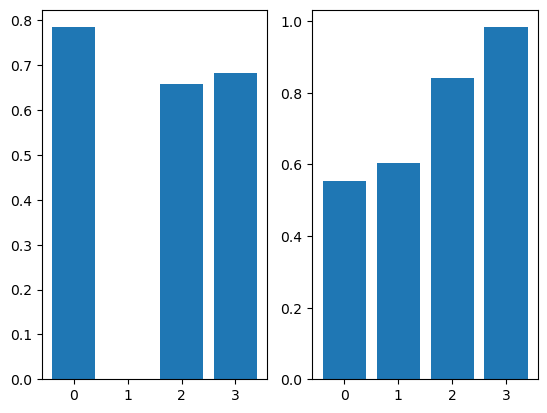

glass
0 0.8518518518518519
1 0.2727272727272727
2 0.8
3 0.0
4 1.0
5 0.75
 
0 0.6296296296296297
1 0.45454545454545453
2 0.0
3 0.0
4 1.0
5 0.75


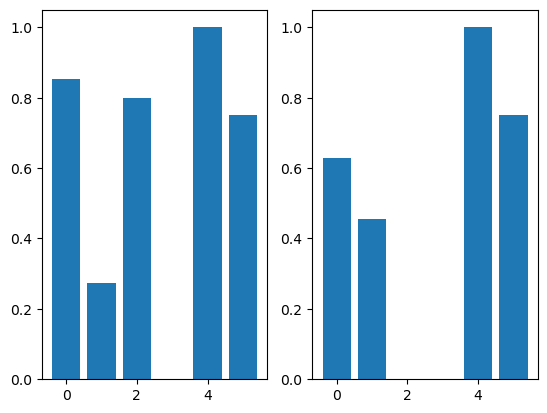

ecoli
0 0.9523809523809523
1 0.7307692307692307
11
3 0.0
4 0.6666666666666666
5 1.0
6 0.5
7 0.0
 
0 0.9761904761904762
1 0.8846153846153846
11
3 0.0
4 0.5
5 0.0
6 0.0
7 0.875


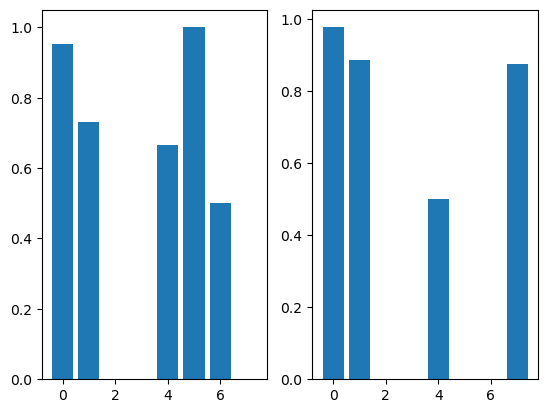

yeast
0 0.0
1 0.45454545454545453
2 0.17647058823529413
3 0.375
4 0.3333333333333333
5 0.0
6 0.0
7 0.3333333333333333
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0018181818181818182
13 0.14285714285714285
 
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 1.0
13 0.0


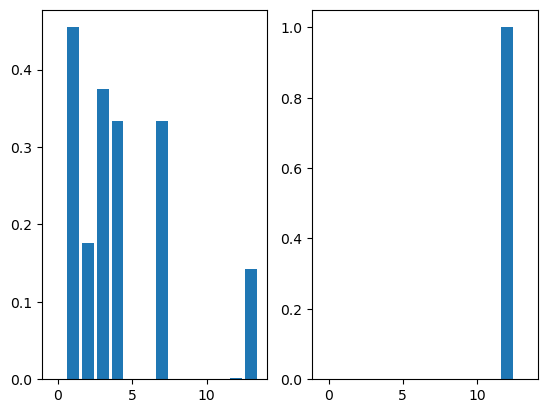

opt
0 0.92
1 0.8242424242424242
2 0.7590361445783133
3 0.9005524861878453
4 0.9520958083832335
5 0.9555555555555556
6 0.9540229885057471
7 0.8802395209580839
8 0.8333333333333334
9 0.9871794871794872
 
0 0.9542857142857143
1 0.9757575757575757
2 0.9759036144578314
3 0.9447513812154696
4 0.9520958083832335
5 0.9666666666666667
6 0.9827586206896551
7 0.9461077844311377
8 0.9551282051282052
9 0.9743589743589743


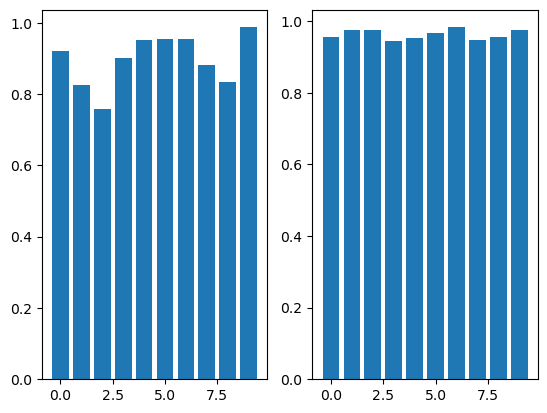

satimage
0 0.9548387096774194
1 0.8732394366197183
2 0.7666666666666667
3 0.8833333333333333
4 0.8055555555555556
5 0.05396825396825397
 
0 0.9806451612903225
1 0.9436619718309859
2 0.9266666666666666
3 0.30833333333333335
4 0.7708333333333334
5 0.9174603174603174


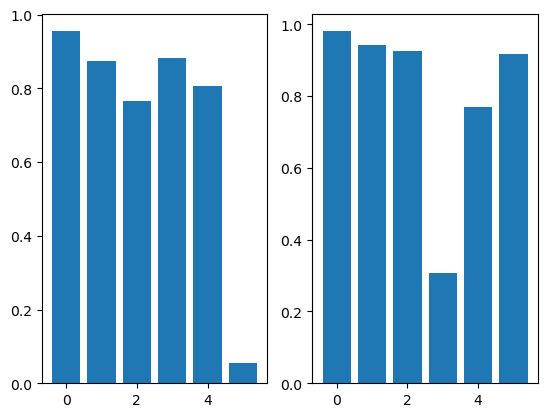

pen
0 0.9164345403899722
1 0.7159763313609467
2 0.9817629179331308
3 0.9748427672955975
4 0.9567723342939481
5 0.871875
6 0.9435215946843853
7 0.66
8 0.6707317073170732
9 0.4318181818181818
 
0 0.9442896935933147
1 0.9408284023668639
2 0.9817629179331308
3 0.9874213836477987
4 0.9769452449567724
5 0.903125
6 0.9867109634551495
7 0.9628571428571429
8 0.9176829268292683
9 0.9383116883116883


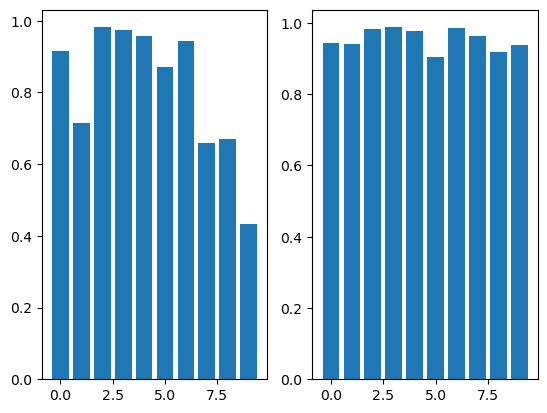

letter
0 0.6666666666666666
1 0.6727272727272727
2 0.8826086956521739
3 0.0611353711790393
4 0.2978723404255319
5 0.5627906976744186
6 0.21585903083700442
7 0.24553571428571427
8 0.75
9 0.6008230452674898
10 0.37168141592920356
11 0.2825112107623318
12 0.39094650205761317
13 0.2747747747747748
14 0.6903765690376569
15 0.759493670886076
16 0.3941908713692946
17 0.7805907172995781
18 0.08968609865470852
19 0.38222222222222224
20 0.7935222672064778
21 0.8401826484018264
22 0.9285714285714286
23 0.12648221343873517
24 0.405982905982906
25 0.7878787878787878
 
0 0.9071729957805907
1 0.759090909090909
2 0.7956521739130434
3 0.8253275109170306
4 0.7659574468085106
5 0.7767441860465116
6 0.5374449339207048
7 0.45982142857142855
8 0.8194444444444444
9 0.7983539094650206
10 0.7300884955752213
11 0.7937219730941704
12 0.9176954732510288
13 0.8738738738738738
14 0.6276150627615062
15 0.8396624472573839
16 0.7344398340248963
17 0.70042194092827
18 0.6053811659192825
19 0.8044444444444444
20 0.86639

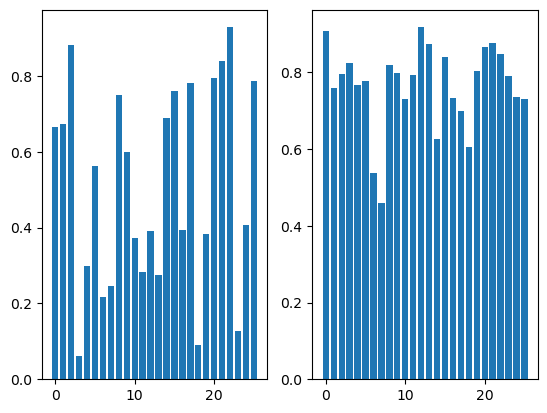

page
0 0.31639566395663954
1 0.7722772277227723
2 0.625
3 0.9615384615384616
4 0.967741935483871
 
0 0.989159891598916
1 0.7920792079207921
2 0.5
3 0.8846153846153846
4 0.45161290322580644


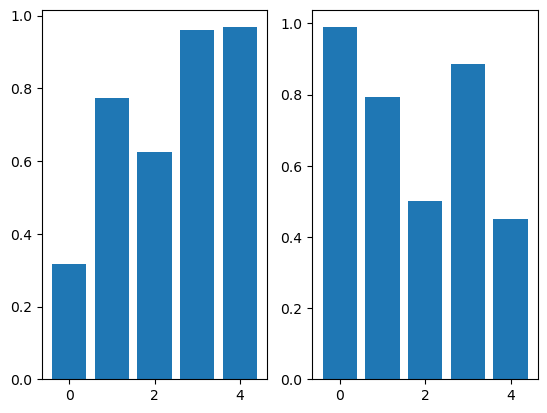

In [217]:
datalist = [
    'veh',
    'glass',
    'ecoli',
    'yeast',
    'opt',
    'satimage',
    'pen',
    'letter',
    'page',

    # 'mnist'
]

for name in datalist:
    print(name)

    xy,label,n_class,train_size_list,test_size_list = load_dataset(name)    
    train_xy = xy[:int(len(xy) * 0.7)]
    test_xy = xy[int(len(xy) * 0.7):]

    train_label = label[:int(len(xy) * 0.7)]
    test_label = label[int(len(xy) * 0.7):]
    n_dim = xy.shape[1]
    train_size = int(len(xy))


    pca_model = PCA(n_components=1).fit(xy)
    fc = pca_model.transform(xy)
    new_xy, new_label = get_bias_training_data(xy,label,None)

    clf_policy = LogisticRegression(random_state=0).fit(new_xy,new_label)
    predict_label = clf_policy.predict(test_xy)

    biased_policy = []
    plt.subplot(1,2,1)
    for i in range(len(np.unique(label))):
        index = (test_label == i)
        try:
            if sum(index) == 0:
                print(11)
                biased_policy.append(0)
            else:
                print(i,sum(predict_label[index] == test_label[index])/len(test_label[index]))
                biased_policy.append(sum(predict_label[index] == test_label[index])/len(test_label[index]))
        except:
            print(1)
    plt.bar(np.unique(label),biased_policy)
    
    unbiased_policy = []
    plt.subplot(1,2,2)
    clf_policy = LogisticRegression(random_state=0).fit(train_xy[:int(train_size)],train_label[:int(1*train_size)])
    predict_label = clf_policy.predict(test_xy)
    print(' ')
    for i in range(len(np.unique(label))):
        index = (test_label == i)
        if sum(index) == 0:
            print(11)
            unbiased_policy.append(0)
        else:
            print(i,sum(predict_label[index] == test_label[index])/len(test_label[index]))
            unbiased_policy.append(sum(predict_label[index] == test_label[index])/len(test_label[index]))
            
    plt.bar(np.unique(label),unbiased_policy)
    
    plt.show()
    
    

In [222]:
xy,label,n_class,train_size_list,test_size_list = load_dataset(name)    
train_xy = xy[:int(len(xy) * 0.7)]
test_xy = xy[int(len(xy) * 0.7):]

train_label = label[:int(len(xy) * 0.7)]
test_label = label[int(len(xy) * 0.7):]
n_dim = xy.shape[1]
train_size = int(len(xy))


pca_model = PCA(n_components=1).fit(xy)
fc = pca_model.transform(xy)
pdf, mean_logging, std_logging = get_distribution(fc, 0.2,3)


In [230]:
def sample_logging_data(xy, label, pdf):
    index_list = [i for i in range(len(xy))]
    new_label = []

    for i in range(train_size):
        t_index = random.choices(index_list[:train_size], weights=pdf[:train_size])[0]
        # t_index = i
        new_label.append(label[t_index])
    return new_label

In [231]:
new_label = sample_logging_data(xy, label, pdf)

opt


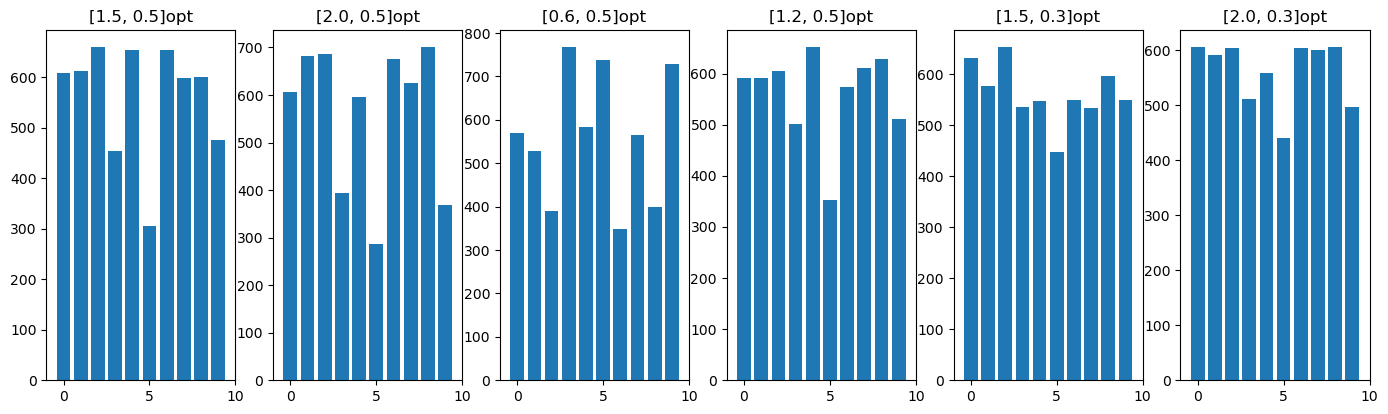

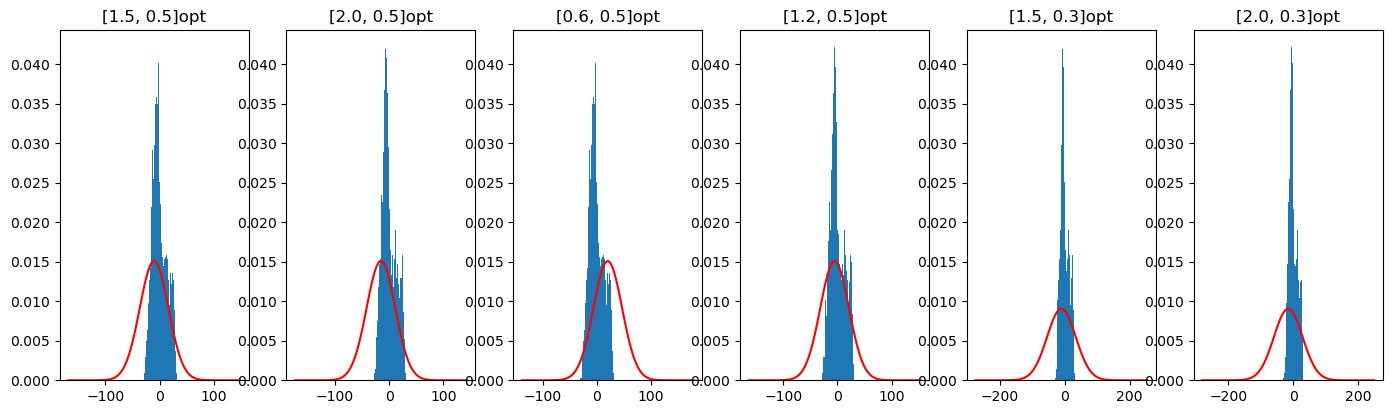

In [278]:
datalist = [
#     'veh',
#     'glass',
#     'ecoli',
#     'yeast',
    'opt',
#     'satimage',
#     'pen',
#     'letter',
#     'page',

    # 'mnist'
]
# xshift_logging = [[0.2,2],[0.4,2],[1.5,2],[2.0,2],[0.6,2],[1.2,2], [0.2,3],[0.4,3],[1.5,3],[2.0,3],[0.4,4],]
# xshift_logging += [[1.2,3],[0.6,4],[1.2,4]]
xshift_logging = [[1.5,0.5],[2.0,0.5],[0.6,0.5],[1.2,0.5], [1.5,0.3],[2.0,0.3],]
for name in datalist:
    print(name)
    
    xy,label,n_class,train_size_list,test_size_list = load_dataset(name)    
    train_xy = xy[:int(len(xy) * 0.7)]
    test_xy = xy[int(len(xy) * 0.7):]

    train_label = label[:int(len(xy) * 0.7)]
    test_label = label[int(len(xy) * 0.7):]
    n_dim = xy.shape[1]
    train_size = int(len(xy))


    pca_model = PCA(n_components=1).fit(xy)
    fc = pca_model.transform(xy)
    
    fig = plt.figure(figsize=(20,10))

    
    for i, xshift in enumerate(xshift_logging):
        pdf, mean_logging, std_logging = get_distribution(fc, xshift[0],xshift[1])
        
        new_label = sample_logging_data(xy, label, pdf)
        
        d = dict(Counter(new_label))
        plt.subplot(2,7,i+1)
        plt.bar(d.keys(),d.values())
        plt.xlim((-1,1+max(label)))

        plt.title(str(xshift) + name) 
    plt.show()
    fig = plt.figure(figsize=(20,10))
    for i, xshift in enumerate(xshift_logging):
        pdf, mean_logging, std_logging = get_distribution(fc, xshift[0],xshift[1])
        import math
        def normal_distribution(x, mean, sigma):
            return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)
        plt.subplot(2,7,i+1)
        mean1, sigma1 = mean_logging, std_logging
        x1 = np.linspace(mean1 - 6*sigma1, mean1 + 6*sigma1, 100)
        y1 = normal_distribution(x1, mean1, sigma1)
        plt.subplot(2,7,i+1)
        plt.plot(x1, y1, 'r', label='m=0,sig=1')
        plt.hist(fc,bins = 100,density = True)        

        plt.title(str(xshift) + name ) 
        
    plt.show()


    

In [279]:
pdf

array([[0.00015673],
       [0.00019277],
       [0.00019254],
       ...,
       [0.00018872],
       [0.00019568],
       [0.00019335]])

In [280]:
np.ones(len(xy))/len(xy)

array([0.00017794, 0.00017794, 0.00017794, ..., 0.00017794, 0.00017794,
       0.00017794])

In [282]:
6000*0.9 * 1 + 600*9

10800.0